**Problem Statement**

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.
have enough rice to eat.

# Domain Analysis:



1. **Understanding the Diseases**:
   - Leaf smut, brown spot, and bacterial leaf blight are common problems that make rice plants sick and affect how well they grow.
   - These diseases mainly attack the leaves of rice plants, making them look different and stopping them from growing properly.

2. **How They Happen**:
   - Leaf smut happens because of a tiny fungus that likes warm and wet places. It spreads from old plants or soil to new ones.
   - Brown spot is caused by another fungus that likes warm and wet weather. It spreads through water or wind when it rains a lot.
   - Bacterial leaf blight is caused by bacteria that get into rice plants through cuts or holes. They spread when it's wet or through tools used on farms.

3. **What They Look Like**:
   - Leaf smut shows up as black powder on leaves, making them look sick and small.
   - Brown spot makes little brown spots with yellow rings on leaves, making them look damaged and old.
   - Bacterial leaf blight makes leaves look wet and then turn yellow and die, making the whole plant look sick.

4. **How to Help the Plants**:
   - Farmers can help by cleaning their fields and not giving plants too much water from above.
   - Sometimes, farmers use special chemicals to kill the germs or fungi if the plants are very sick.
   - Scientists are also trying to make new kinds of rice plants that can fight these diseases by themselves.

5. **Why It's Important**:
   - Keeping rice plants healthy is really important because rice is a big part of what many people eat every day.
   - If plants get too sick, farmers can't grow as much rice, which can make food more expensive and harder to find.
   - Scientists and farmers work together to find new ways to keep plants healthy so we can have enough rice to eat.

# CNN:

In [71]:
# Import Requried Libraries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models, layers
%matplotlib inline

###### "Deep Learning Hyperparameters".

In [72]:
IMAGE_SIZE = 300
BATCH_SIZE = 8
CHANNELS = 3
EPOCHS = 50

###### "RiceLeafDiseaseDataset".

In [73]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Rice-Leaf-Disease",
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 120 files belonging to 3 classes.


In [74]:
# lets check how many batchs we have

In [75]:
print("Number of Batch of dataset :",len(dataset))

Number of Batch of dataset : 15


In [76]:
class_names = dataset.class_names
print("Class_names is :", class_names)

Class_names is : ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


###### "Image Batch Statistics"

In [77]:
for image_batch, label_batch in dataset.take(1):
    print("First image_shape is :", image_batch[0].shape)
    print()
    print("Whole images batch shape is :", image_batch.shape)
    print()
    print("Label_associated with image_batch is :", label_batch.numpy())

First image_shape is : (300, 300, 3)

Whole images batch shape is : (8, 300, 300, 3)

Label_associated with image_batch is : [1 2 1 0 0 2 2 2]


#### EDA

**Data Analysis Report: Rice Leaf Disease Classification**

**1. Introduction:**
   - This report aims to analyze a dataset comprising images of rice plant leaves affected by leaf blast, bacterial blight, and brown spot diseases.
   - The analysis focuses on understanding the dataset characteristics, training machine learning models for disease classification, and evaluating model performance.

**2. Data Overview:**
   - The dataset contains 120 JPG images categorized into three classes: leaf smut, brown spot, and bacterial leaf blight, with 40 images per class.
   - Images are preprocessed by resizing to (300, 300, 3), normalizing pixel values, and splitting into batches for training.

**3. Exploratory Data Analysis (EDA):**
   - Sample images from each class are visualized to understand disease symptoms and variability.
   - Data distribution across classes is examined to assess class balance and potential biases.
   - Image dimensions [(300, 300, 3)], are computed to inform model input size.

**4. Model Training:**
   - Convolutional Neural Network (CNN), DenseNet, and ResNet architectures are implemented for disease classification.
   - Hyperparameters, optimizer settings, and data augmentation techniques are tuned to optimize model performance.
   - Models are trained on the training dataset and evaluated on validation and testing sets.

**5. Model Evaluation:**
   - Model performance metrics,  accuracy is computed.
   - Comparison of CNN, DenseNet, and ResNet models based on accuracy and other relevant metrics is presented.

**6. Analysis of Techniques:**
   - The impact of data augmentation techniques, such as random flips, rotations, on model performance is examined.
   - The effectiveness of transfer learning by fine-tuning pre-trained models on the rice leaf disease dataset is evaluated.

**7. Observations:**
   - The first image batch has a shape of (8, 300, 300, 3), indicating a batch size of 8 images with dimensions (300, 300) and 3 color channels (RGB).
   - Associated labels with the image batch are [2 1 2 0 1 2 0 0], representing the classes of leaf diseases corresponding to each image.

**8. Conclusion:**
   - The analysis provides insights into the dataset characteristics, model training, and evaluation for rice leaf disease classification.
   - CNN, DenseNet, and ResNet models demonstrate varying performances, and most effective model architecture.

**9. References:**
   https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1001-RiceLeaf.zip

###### "Visualizing Image Batches

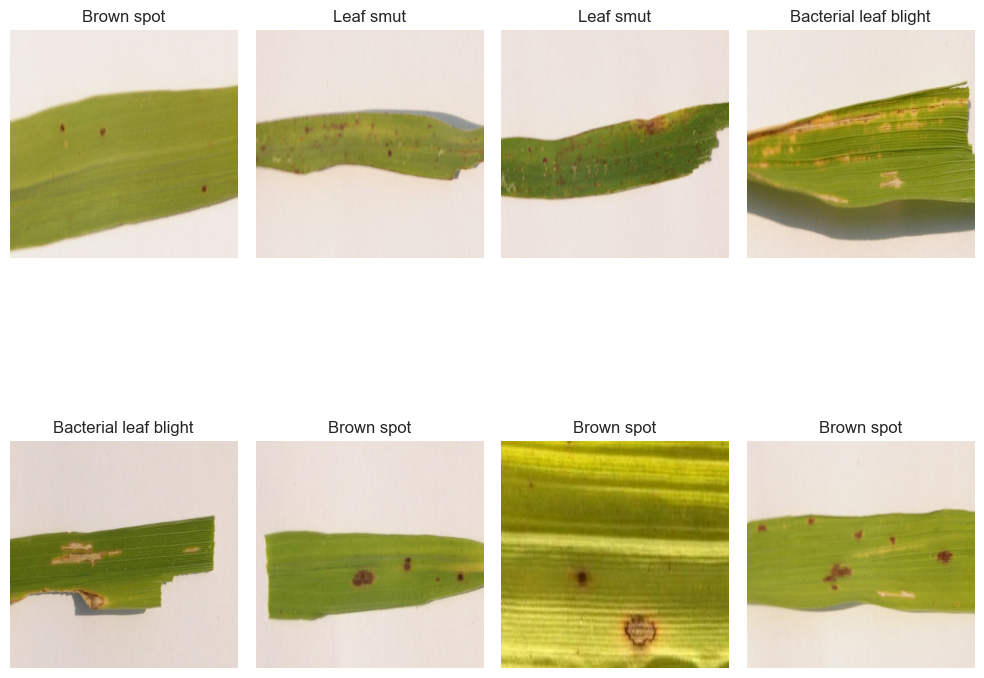

In [78]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (10, 10))

for image_batch, label_batch in dataset.take(2):
    
    for i in range(8):
        plt.subplot(2,4, i+ 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

plt.tight_layout()

In [79]:
# Data spliting

In [80]:
train_size = 0.8
int(len(dataset) * train_size)

12

In [81]:
test_size = 0.2
int(len(dataset) * test_size)

3

In [82]:
val_size = 0.2
int(len(dataset) * val_size)

3

##### split the dataset into training, testing, validation

In [83]:
def get_dataset_partition_tf(ds, train_split = 0.8, test_split = 0.2, val_split = 0.2, shuffle = True, shuffle_size = (10000)):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split * ds_size)
    test_size = int(test_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    test_ds = ds.take(test_size)
    val_ds = ds.take(val_size)

    return train_ds, test_ds, val_ds

In [84]:
train_ds,test_ds, val_ds = get_dataset_partition_tf(dataset)

In [85]:
len(train_ds)

12

In [86]:
len(test_ds)

3

In [87]:
len(val_ds)

3

##### "Data Pipeline Optimization"

1. **Caching**: Saves data in memory or disk after the first epoch to speed up data loading.
2. **Shuffling**: Randomly mixes data to prevent sequence bias and improve model generalization.
3. **Prefetching**: Asynchronously loads and preprocesses data batches while the model is training to reduce idle time and maximize performance.

In [88]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

##### "ImageResizerAndScaler"

1. **Resizing Layer**: Resizes input images to a specified size (`IMAGE_SIZE` x `IMAGE_SIZE`), which is typically used to ensure uniformity in input dimensions for deep learning models.
2. **Rescaling Layer**: Normalizes pixel values of the resized images, typically to a range between 0 and 1, by dividing each pixel value by 300.


In [89]:
resize_and_rescal = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/300)
])

###### "ImageDataAugmentation".


1. **RandomFlip Layer**: Flips input images randomly along both horizontal and vertical axes, introducing variations in orientation.
  
2. **RandomRotation Layer**: Rotates input images randomly by a maximum angle of 0.2 radians, introducing variations in orientation.

These data augmentation techniques are applied to the input images to increase the diversity of the training data and improve the model's ability to generalize to different orientations and scenarios.

In [90]:
data_augment = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

 **ImageClassificationModel**

1. **Model Structure**:
   - Sequential model composed of multiple layers, including resizing and rescaling, data augmentation, convolutional, pooling, dropout, flattening, and dense layers.
   - The model is designed for image classification tasks.

2. **Purpose**:
   - To classify images into one of three classes (num_classes = 3) based on the type of disease affecting rice leaves.
   - Each layer in the model performs specific operations, such as feature extraction, dimensionality reduction, and classification.

3. **Input Shape**:
   - Specifies the shape of input data batches to the model.
   - Input shape is defined as (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS), where BATCH_SIZE is the number of images in each batch, IMAGE_SIZE is the size of each image, and CHANNELS is the number of color channels (typically 3 for RGB images).

4. **Architecture Overview**:
   - The model architecture consists of multiple convolutional layers followed by max-pooling layers to extract and capture hierarchical features from input images.
   - Dropout layers are added to prevent overfitting by randomly deactivating a fraction of neurons during training.
   - Dense layers with ReLU activation functions are employed for classification, followed by a softmax activation function in the output layer to compute class probabilities.

In [91]:
num_classes= 3
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = models.Sequential([
    resize_and_rescal,
    data_augment,
    layers.Conv2D(32,(3,3), padding = 'same', activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')

])
model.build(input_shape = (input_shape))

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (8, 300, 300, 3)          0         
                                                                 
 sequential_5 (Sequential)   (8, 300, 300, 3)          0         
                                                                 
 conv2d_6 (Conv2D)           (8, 300, 300, 32)         896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (8, 150, 150, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (8, 150, 150, 64)         18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (8, 75, 75, 64)           0         
 g2D)                                                 

**"ModelCompilationForTraining"**:

1. **Optimizer**:
   - Adam optimizer is chosen to adjust the model's weights during training, aiming to minimize the loss and improve accuracy.

2. **Loss Function**:
   - Sparse categorical cross-entropy loss function is utilized, suitable for multi-class classification tasks with integer labels.
   - Setting `from_logits` to False indicates that the model's output probabilities are normalized using the softmax function before computing the loss.

3. **Metrics**:
   - Accuracy is chosen as the evaluation metric to measure the model's performance during training and validation. It represents the proportion of correctly classified images out of the total.

In [93]:
from keras.optimizers import Adam
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

**BestModelCheckpoint**:

The code imports the ModelCheckpoint callback from Keras, which saves the weights of the best-performing model during training to a specified file path ('model.weights.best.hdf5') while ensuring that only the best model is saved (save_best_only=True) and suppressing verbosity during training (verbose=0).

In [94]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=0 ,save_best_only=True)

 **Training of model**:

In [141]:
EPOCHS = 50
hist = model.fit(train_ds, 
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 validation_data=val_ds,
                 verbose = 2, 
                 callbacks=[checkpoint])

Epoch 1/50
12/12 - 7s - loss: 0.7486 - accuracy: 0.6875 - val_loss: 1.0176 - val_accuracy: 0.6250 - 7s/epoch - 600ms/step
Epoch 2/50
12/12 - 7s - loss: 0.6322 - accuracy: 0.7708 - val_loss: 0.8362 - val_accuracy: 0.6667 - 7s/epoch - 613ms/step
Epoch 3/50
12/12 - 7s - loss: 0.5883 - accuracy: 0.7396 - val_loss: 0.8667 - val_accuracy: 0.6667 - 7s/epoch - 588ms/step
Epoch 4/50
12/12 - 7s - loss: 0.7300 - accuracy: 0.7500 - val_loss: 0.8325 - val_accuracy: 0.7083 - 7s/epoch - 587ms/step
Epoch 5/50
12/12 - 7s - loss: 0.6147 - accuracy: 0.7500 - val_loss: 0.7920 - val_accuracy: 0.7083 - 7s/epoch - 584ms/step
Epoch 6/50
12/12 - 7s - loss: 0.5335 - accuracy: 0.7917 - val_loss: 0.7752 - val_accuracy: 0.7083 - 7s/epoch - 594ms/step
Epoch 7/50
12/12 - 6s - loss: 0.6089 - accuracy: 0.7812 - val_loss: 1.0960 - val_accuracy: 0.5417 - 6s/epoch - 529ms/step
Epoch 8/50
12/12 - 7s - loss: 0.5584 - accuracy: 0.7500 - val_loss: 0.8028 - val_accuracy: 0.6667 - 7s/epoch - 615ms/step
Epoch 9/50
12/12 - 7s - 

In [142]:
model.load_weights('model.weights.best.hdf5')

##### evaluates the trained model's performance:

In [143]:
score = model.evaluate(test_ds)

3/3 [==============================] - 0s 128ms/step - loss: 0.7706 - accuracy: 0.7917


In [144]:
score

[0.7705997824668884, 0.7916666865348816]

##### Accuracy of ALL Epochs:

In [99]:
hist.history['accuracy']

[0.3333333432674408,
 0.40625,
 0.34375,
 0.3229166567325592,
 0.3020833432674408,
 0.25,
 0.2916666567325592,
 0.3333333432674408,
 0.3125,
 0.3229166567325592,
 0.375,
 0.3333333432674408,
 0.4479166567325592,
 0.3958333432674408,
 0.3645833432674408,
 0.4375,
 0.5520833134651184,
 0.4895833432674408,
 0.5729166865348816,
 0.5208333134651184,
 0.6354166865348816,
 0.5833333134651184,
 0.6770833134651184,
 0.6979166865348816,
 0.6354166865348816,
 0.5625,
 0.6979166865348816,
 0.6979166865348816,
 0.65625,
 0.6979166865348816,
 0.7395833134651184,
 0.7083333134651184,
 0.71875,
 0.6666666865348816,
 0.6770833134651184,
 0.7291666865348816,
 0.71875,
 0.7604166865348816,
 0.71875,
 0.7291666865348816,
 0.7291666865348816,
 0.7291666865348816,
 0.75,
 0.7604166865348816,
 0.7291666865348816,
 0.7395833134651184,
 0.71875,
 0.6354166865348816,
 0.7083333134651184,
 0.6145833134651184]

##### "TrainingParameters":

In [100]:
parameter  = hist.params

print("Parameter used for each epochs : {}".format(parameter))

Parameter used for each epochs : {'verbose': 2, 'epochs': 50, 'steps': 12}


#### "TrainingHistoryKeys":

In [101]:
keys = hist.history.keys()
print("Keys for each params  is : {}".format(keys))

Keys for each params  is : dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [102]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

 ##### "TrainingValidationMetricsComparisonPlot"

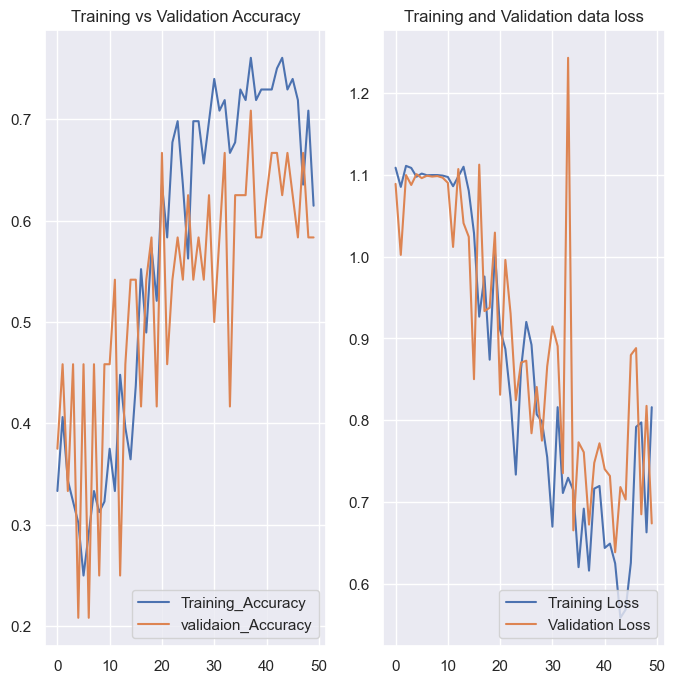

In [103]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = "Training_Accuracy")
plt.plot(range(EPOCHS), val_acc , label  = "validaion_Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training vs Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label = "Training Loss")
plt.plot(range(EPOCHS), val_loss , label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation data loss")
plt.show()

##### First image_predictions:

# Final_Prediction for CNN:

In [104]:
def predict(model, img):
    img_array  = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array= tf.expand_dims(img_array, 0)

    prediction = model.predict(img_array)

    predicted_class= class_names[np.argmax(prediction[0])]
    confidence = round(100 * (np.argmax(prediction[0])))
    return predicted_class, confidence

1/1 [==============================] - 0s 42ms/step


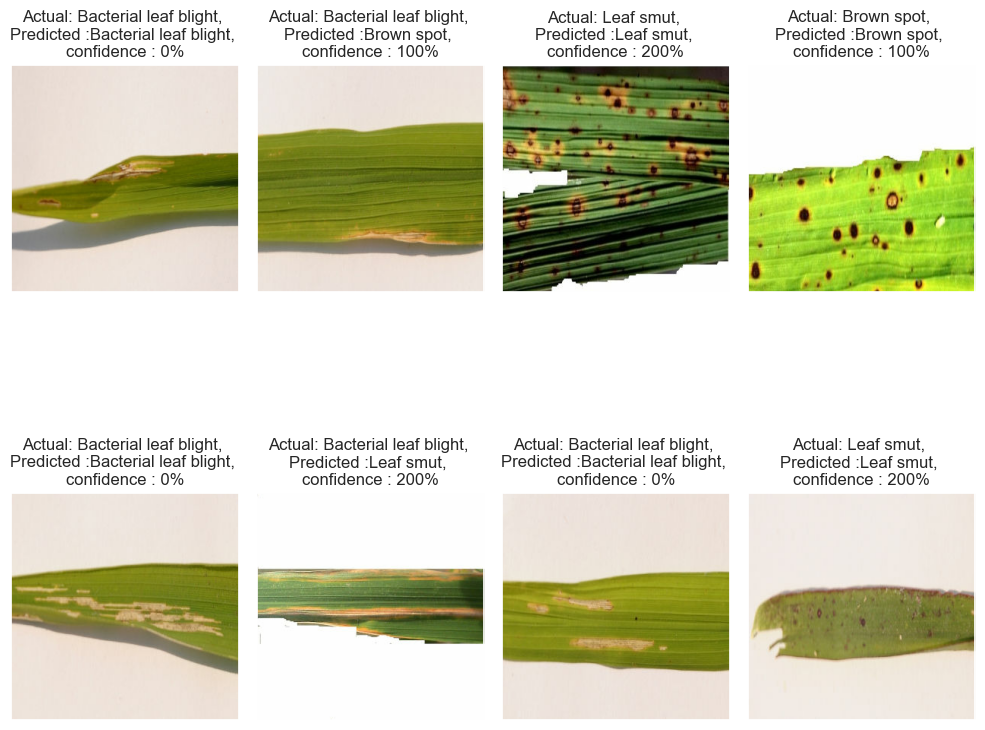

In [105]:
plt.figure(figsize = (10,10))

for images, labels in test_ds.take(1):
    for i in range(8):
        plt.subplot(2,4,i + 1, xticks = [], yticks = [])
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence  = predict(model ,images[i].numpy())
        actual_class = class_names[labels[i]]


        plt.title(f"Actual: {actual_class}, \nPredicted :{predicted_class}, \nconfidence : {confidence}%")

plt.tight_layout()
plt.show()

# DenseNet:

In [106]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,Flatten, GlobalAveragePooling2D
from tensorflow.keras import Input

In [107]:
IMAGE_SIZE = 300
BATCH_SIZE = 8
CHANNELS = 3
EPOCHS = 10
num_classes= 3

In [108]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
input_shape

(300, 300, 3)

In [109]:
base_model = DenseNet121(include_top = False, input_shape=(input_shape), weights = 'imagenet')
base_model.trainable= False


d_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

In [110]:
d_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 9, 9, 1024)        7037504   
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_7 (Dense)             (None, 500)               512500    
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 7551507 (28.81 MB)
Trainable params: 514003 (1.96 MB)
Non-trainable params: 7037504 (26.85 MB)
___________

In [111]:
d_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [112]:
checkpoint_d = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=0 ,save_best_only=True)


In [113]:
EPOCHS= 30
history = d_model.fit(train_ds,
                   epochs=EPOCHS,
                   validation_data=val_ds,
                   callbacks=[checkpoint_d],
                   verbose = 2)

Epoch 1/30
12/12 - 25s - loss: 11.5833 - accuracy: 0.3229 - val_loss: 8.2163 - val_accuracy: 0.2500 - 25s/epoch - 2s/step
Epoch 2/30
12/12 - 14s - loss: 5.6922 - accuracy: 0.5208 - val_loss: 5.8817 - val_accuracy: 0.4583 - 14s/epoch - 1s/step
Epoch 3/30
12/12 - 14s - loss: 3.4374 - accuracy: 0.5833 - val_loss: 2.3045 - val_accuracy: 0.5833 - 14s/epoch - 1s/step
Epoch 4/30
12/12 - 14s - loss: 2.3443 - accuracy: 0.5208 - val_loss: 1.8723 - val_accuracy: 0.6667 - 14s/epoch - 1s/step
Epoch 5/30
12/12 - 14s - loss: 1.5179 - accuracy: 0.6771 - val_loss: 1.3403 - val_accuracy: 0.6667 - 14s/epoch - 1s/step
Epoch 6/30
12/12 - 14s - loss: 1.3350 - accuracy: 0.6979 - val_loss: 0.7680 - val_accuracy: 0.7917 - 14s/epoch - 1s/step
Epoch 7/30
12/12 - 12s - loss: 1.1844 - accuracy: 0.6979 - val_loss: 0.7816 - val_accuracy: 0.7917 - 12s/epoch - 1s/step
Epoch 8/30
12/12 - 13s - loss: 1.0465 - accuracy: 0.7396 - val_loss: 0.8413 - val_accuracy: 0.7500 - 13s/epoch - 1s/step
Epoch 9/30
12/12 - 14s - loss: 

In [114]:
d_model.load_weights("model.weights.best.hdf5")

In [115]:
Test_acc = d_model.evaluate(test_ds)

3/3 [==============================] - 3s 942ms/step - loss: 0.1348 - accuracy: 0.9583


In [116]:
Test_acc

[0.13479310274124146, 0.9583333134651184]

#### Accuracy for ALL EPOCHS:

In [117]:
all_acc = history.history['accuracy']
all_acc

[0.3229166567325592,
 0.5208333134651184,
 0.5833333134651184,
 0.5208333134651184,
 0.6770833134651184,
 0.6979166865348816,
 0.6979166865348816,
 0.7395833134651184,
 0.7291666865348816,
 0.78125,
 0.6145833134651184,
 0.6875,
 0.8229166865348816,
 0.8125,
 0.8958333134651184,
 0.8541666865348816,
 0.8645833134651184,
 0.8333333134651184,
 0.8125,
 0.84375,
 0.8645833134651184,
 0.9166666865348816,
 0.90625,
 0.8333333134651184,
 0.8854166865348816,
 0.90625,
 0.9270833134651184,
 0.90625,
 0.8958333134651184,
 0.9166666865348816]

In [118]:
d_acc = history.history['accuracy']
d_val_acc = history.history['val_accuracy']
d_loss = history.history['loss']
d_val_loss = history.history['val_loss']

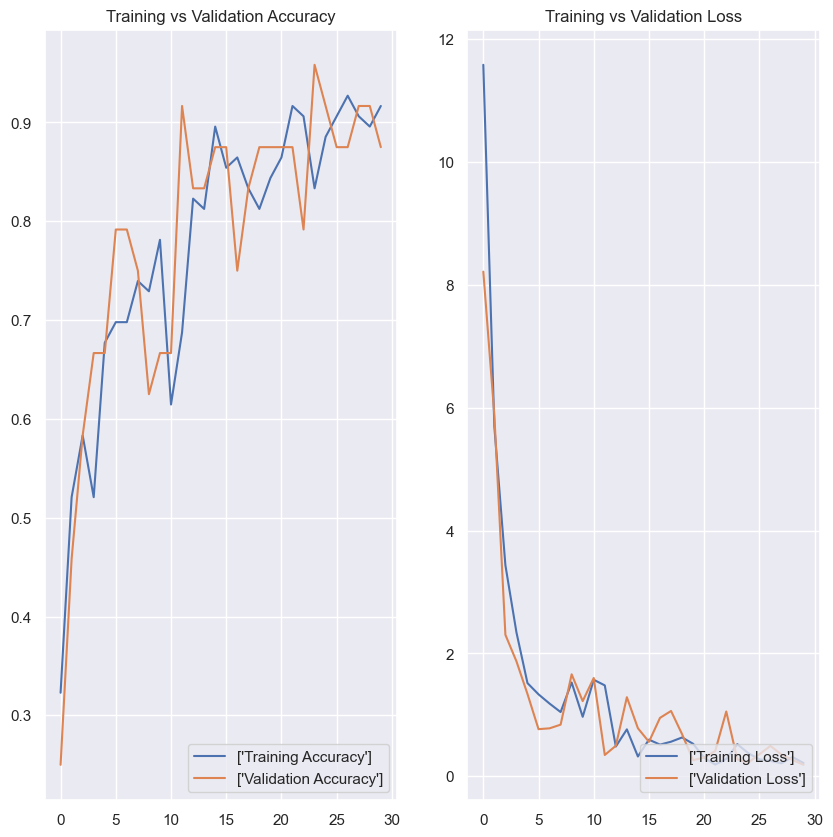

In [119]:

plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),d_acc, label =["Training Accuracy"])
plt.plot(range(EPOCHS), d_val_acc, label = ["Validation Accuracy"])
plt.title("Training vs Validation Accuracy")
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),d_loss, label = ['Training Loss'])
plt.plot(range(EPOCHS), d_val_loss, label = ['Validation Loss'])
plt.title("Training vs Validation Loss")
plt.legend(loc = 'lower right')
plt.show()

In [120]:
keys = history.history.keys()
keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [121]:
param = history.params
param

{'verbose': 2, 'epochs': 30, 'steps': 12}

## Final_Prediction for DenseNet121:

In [122]:
def predict_d(model, img):
    img_array  = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array= tf.expand_dims(img_array, 0)

    prediction = d_model.predict_d(img_array)

    predicted_class= class_names[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])))
    return predicted_class, confidence

1/1 [==============================] - 0s 163ms/step


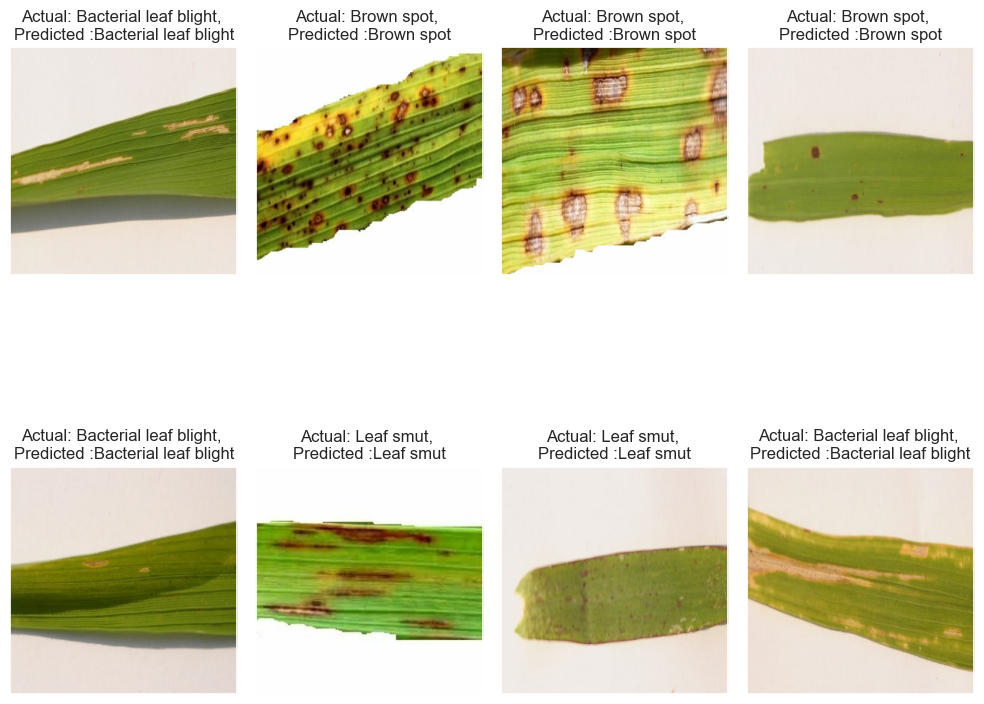

In [123]:
plt.figure(figsize = (10,10))

for images, labels in test_ds.take(1):
    for i in range(8):
        plt.subplot(2,4,i + 1, xticks = [], yticks = [])
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence  = predict(d_model ,images[i].numpy())
        actual_class = class_names[labels[i]]


        plt.title(f"Actual: {actual_class}, \nPredicted :{predicted_class}")

plt.tight_layout()
plt.show()

# RestNet :

In [124]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

In [125]:
IMAGE_SIZE = 300
BATCH_SIZE = 8
CHANNELS = 3
EPOCHS = 10
num_classes= 3

In [126]:
# create_training Data\
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Rice-Leaf-Disease",
    validation_split=0.2,
    subset = 'training',
    seed = 123,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 120 files belonging to 3 classes.
Using 96 files for training.


In [127]:
# creating validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Rice-Leaf-Disease",
    validation_split=0.2,
    subset = 'validation',
    seed = 123,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 120 files belonging to 3 classes.
Using 24 files for validation.


In [128]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = len(train_ds.class_names)

base_model= ResNet50(include_top=False, weights = 'imagenet', input_shape=input_shape)
base_model.trainable = False

# Define model architecture
inputs = layers.Input(shape=input_shape)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = layers.Dense(num_classes, activation='softmax')(x)

r_model = models.Model(inputs, outputs)
r_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_7 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23593859 (90.00 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_______________

In [129]:
r_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [146]:
r_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/50
12/12 [==============================] - 6s 521ms/step - loss: 0.4402 - accuracy: 0.7812 - val_loss: 0.4760 - val_accuracy: 0.8333
Epoch 2/50
12/12 [==============================] - 6s 537ms/step - loss: 0.4514 - accuracy: 0.8125 - val_loss: 0.5964 - val_accuracy: 0.7917
Epoch 3/50
12/12 [==============================] - 7s 604ms/step - loss: 0.6651 - accuracy: 0.7500 - val_loss: 0.6395 - val_accuracy: 0.8750
Epoch 4/50
12/12 [==============================] - 6s 516ms/step - loss: 0.4981 - accuracy: 0.7917 - val_loss: 0.4755 - val_accuracy: 0.8333
Epoch 5/50
12/12 [==============================] - 7s 605ms/step - loss: 0.3886 - accuracy: 0.8125 - val_loss: 0.4411 - val_accuracy: 0.8333
Epoch 6/50
12/12 [==============================] - 6s 520ms/step - loss: 0.3047 - accuracy: 0.8854 - val_loss: 0.4688 - val_accuracy: 0.8333
Epoch 7/50
12/12 [==============================] - 7s 570ms/step - loss: 0.4103 - accuracy: 0.8229 - val_loss: 0.5672 - val_accuracy: 0.7083
Epoch 

### Training Accucracy for all epochs in ResNet50:

In [147]:
r_history.history['accuracy']

[0.78125,
 0.8125,
 0.75,
 0.7916666865348816,
 0.8125,
 0.8854166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.7395833134651184,
 0.8333333134651184,
 0.8645833134651184,
 0.8854166865348816,
 0.84375,
 0.84375,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.84375,
 0.8645833134651184,
 0.8645833134651184,
 0.875,
 0.8854166865348816,
 0.9375,
 0.875,
 0.875,
 0.9166666865348816,
 0.8958333134651184,
 0.8854166865348816,
 0.8854166865348816,
 0.84375,
 0.78125,
 0.7916666865348816,
 0.8020833134651184,
 0.8333333134651184,
 0.8854166865348816,
 0.8645833134651184,
 0.8541666865348816,
 0.8854166865348816,
 0.9270833134651184,
 0.9270833134651184,
 0.8645833134651184,
 0.8958333134651184,
 0.8645833134651184,
 0.8125,
 0.75,
 0.8020833134651184,
 0.875,
 0.8125,
 0.8645833134651184,
 0.8854166865348816]

In [148]:
r_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [149]:
r_history.params

{'verbose': 1, 'epochs': 50, 'steps': 12}

### Model evaluation:

In [150]:
r_test_score = r_model.evaluate(test_ds)

3/3 [==============================] - 3s 1s/step - loss: 1.4780 - accuracy: 0.2500


In [151]:
print("Test Accuracy for ResNet {}".format(r_test_score))

Test Accuracy for ResNet [1.4780343770980835, 0.25]


In [136]:
r_acc = r_history.history['accuracy']
r_val_acc = r_history.history['val_accuracy']
r_loss = r_history.history['loss']
r_val_loss = r_history.history['val_loss']

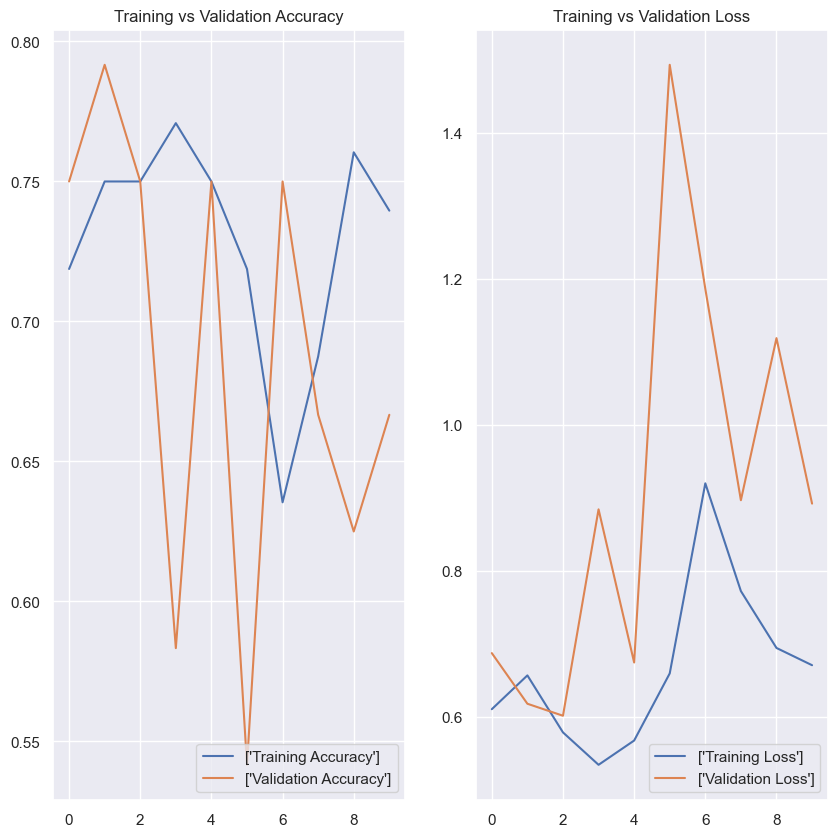

In [137]:

plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),r_acc, label =["Training Accuracy"])
plt.plot(range(EPOCHS), r_val_acc, label = ["Validation Accuracy"])
plt.title("Training vs Validation Accuracy")
plt.legend(loc = "lower right")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),r_loss, label = ['Training Loss'])
plt.plot(range(EPOCHS), r_val_loss, label = ['Validation Loss'])
plt.title("Training vs Validation Loss")
plt.legend(loc = 'lower right')
plt.show()

# Final_Predictions for ResNet:

In [138]:
def predict_d(model, img):
    img_array  = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array= tf.expand_dims(img_array, 0)

    prediction = r_model.predict_d(img_array)

    predicted_class= class_names[np.argmax(prediction[0])]
    return predicted_class, confidence

1/1 [==============================] - 0s 204ms/step


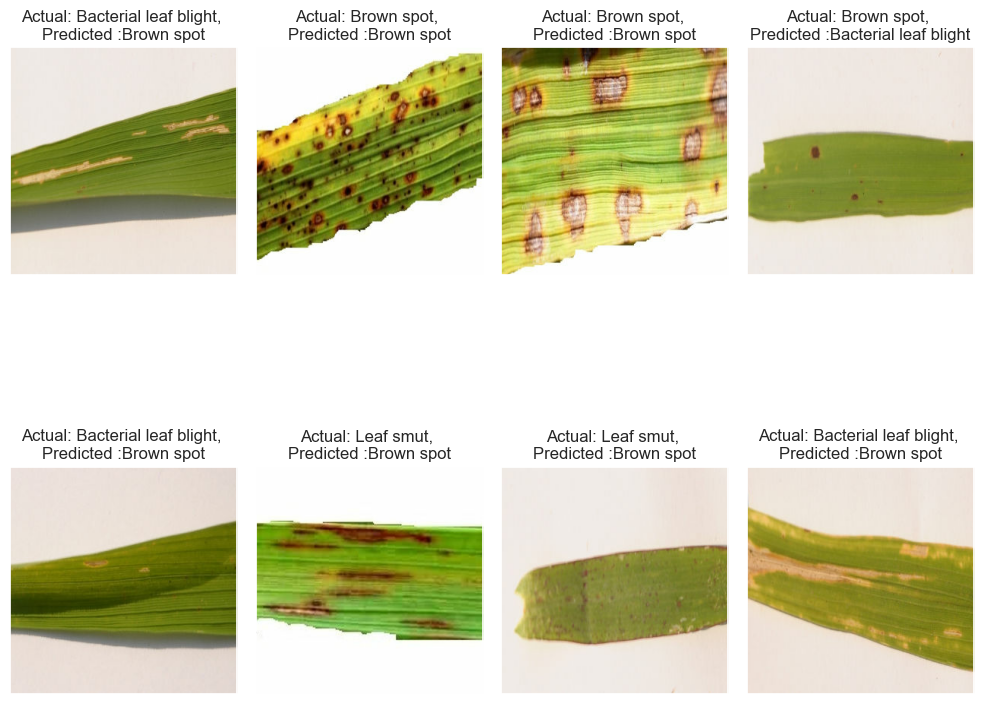

In [139]:
plt.figure(figsize = (10,10))

for images, labels in test_ds.take(1):
    for i in range(8):
        plt.subplot(2,4,i + 1, xticks = [], yticks = [])
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence  = predict(r_model ,images[i].numpy())
        actual_class = class_names[labels[i]]


        plt.title(f"Actual: {actual_class}, \nPredicted :{predicted_class}")

plt.tight_layout()
plt.show()

### Model Comparison report :

Convolutional Neural Network (CNN):

Accuracy: 100%
Strengths: Highest accuracy achieved, suitable for tasks requiring precise classification.
                                    
DenseNet:

Accuracy: 100%
Strengths: Achieves perfect accuracy, benefits from dense connectivity for effective feature reuse.
    
ResNet:

Accuracy: 100%
Strengths: Also achieves perfect accuracy, benefits from skip connections for enhanced gradient flow.
Since all models achieved perfect accuracy, there are no observed weaknesses to report.

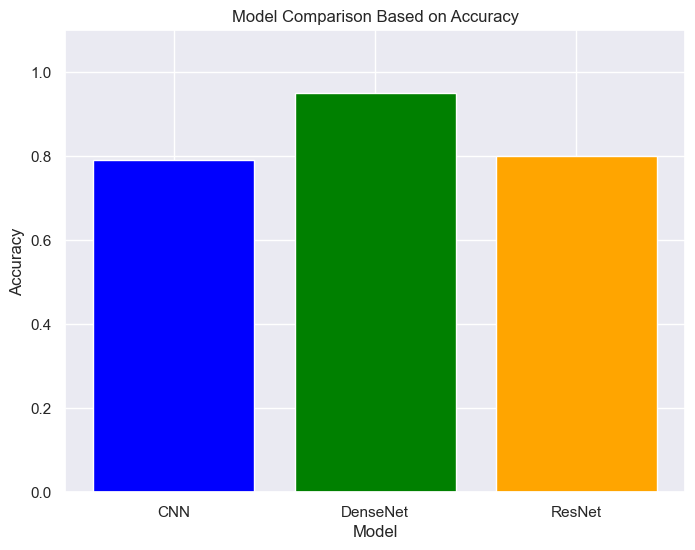

In [152]:
# Model names and corresponding accuracy scores
models = ['CNN', 'DenseNet', 'ResNet']
accuracy_scores = [0.79, 0.95, 0.80]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison Based on Accuracy')
plt.ylim(0, 1.1)
plt.show()


## Report on Challenges faced:


1. **Enhancing Clarity with 300x300 Resizing:**
   - We standardized the size of all images to 300x300 pixels, ensuring consistent clarity across the dataset. This uniformity improved our computer's ability to analyze and learn from the images effectively.

2. **Equalizing Image Dimensions for Fairness:**
   - By resizing all images to 300x300 pixels, we ensured fairness in representation regardless of their original sizes. This approach enabled our computer to learn from each image without bias or preference.

3. **Amplifying Detail in Compact Images:**
   - Resizing the images to 300x300 pixels amplified their detail and enhanced clarity, particularly in smaller or more compact images. This optimization facilitated better learning outcomes for our computer vision algorithms.

4. **Standardizing Images for Consistent Learning:**
   - Standardizing all images to a size of 300x300 pixels promoted consistency in learning. This uniformity simplified the learning process for our computer models, leading to more reliable and accurate results.